Vedant Paithane,2017meb1247

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy import *

In [2]:
x, y = symbols('x y',real=True)

## **Q 1**

In [175]:
#get data

w = (12/47)**(1/2)
time_train = []
for i in np.arange(0, (2*np.pi)/w,0.01):
  time_train.append(i)

time_test = []
for i in np.arange(0, (2*np.pi)/w,0.1):
  time_test.append(i)

In [176]:
#input data
def give_disp(time):
  f = []
  for t in time:
    f.append(2*sin(w*t) +np.random.normal(0.0,0.05)) 
  return f

In [177]:
input_train = give_disp(time_train)
input_test = give_disp(time_test)

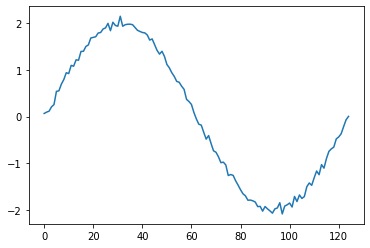

In [178]:
plt.plot(input_test)

In [179]:
#getting weights

def poly_reg_weight(n):

  X = np.zeros((len(time_train),n+1))
  Y = input_train
  for i in range(0,len(time_train)):
    for j in range(0,n+1):
      if j==0:
        X[i][j] = 1
      else:
        X[i][j] = time_train[i]**j
  w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

  return w

In [180]:
#using weights

def poly_predict(w,n):

  X = np.zeros((len(time_test),n+1))
  Y = input_test
  Y_pred = []
  for i in range(0,len(time_test)):
    for j in range(0,n+1):
      if j==0:
        X[i][j] = 1
      else:
        X[i][j] = time_test[i]**j
  
  Y_pred = np.dot(X,w)
  return Y_pred

In [181]:
def final_compare(n):
  weights = poly_reg_weight(n)
  y_pred = poly_predict(weights,n)

  e = np.sum(abs(y_pred - input_test))/len(y_pred) * 100
  print("Test error : ",e)
  plt.plot(input_test, label = "Actual")
  plt.plot(y_pred, label = "Predicted")
  plt.xlabel("Time")
  plt.ylabel("Displacement")
  plt.title("Predicted vs Actual : Test Data, degree = "+str(n))
  plt.legend()
  plt.show()

Test error :  12.2168168753427


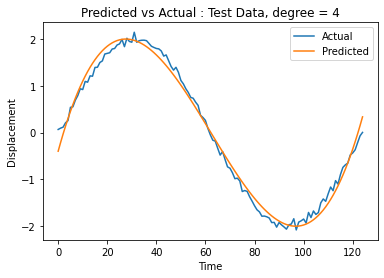

In [182]:
final_compare(4)

Test error :  4.63683999288745


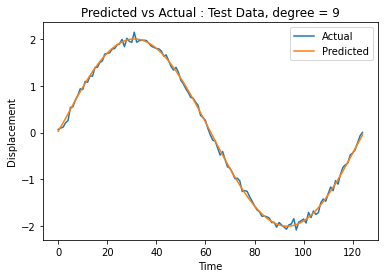

In [183]:
final_compare(9)

Test error :  8.86460781748783


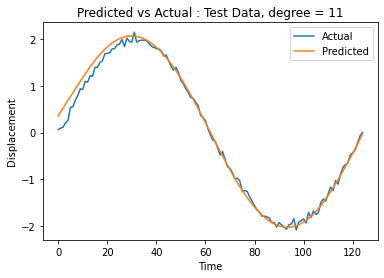

In [184]:
final_compare(11)

## Q2

In [112]:
#stiffness matrix

def give_stiffness(stiffness, n):
  stiffness_matrix = np.zeros((n,n))
  for i in range(n-1):
    stiffness_matrix[i][i] = stiffness[i-1] + stiffness[i]
    stiffness_matrix[i][i+1] = -stiffness[i+1]
    stiffness_matrix[i+1][i] = -stiffness[i+1]

  stiffness_matrix[n-1][n-1] = stiffness[n-1]

  return stiffness_matrix

In [113]:
#use PCA

def find_error_pca(r):
  sort_index = np.argsort(eig_val)[::-1]
  Mse = 0
  X_r_pca = np.zeros((15,20))
  for i in sort_index[0:r]:
    X_r_pca = X_r_pca + np.dot(eig_vec[:,i],disp_main) * eig_vec[:,i].reshape((15,1))

  Mse = np.linalg.norm(disp_main-X_r_pca)**2/20
  return Mse

In [114]:
#use mode approach

def find_error_mode(r):
  sort_index = np.argsort(w_mode)
  Mse = 0
  X_r_pca = np.zeros((15,20))
  for i in sort_index[0:r]:
    X_r_pca = X_r_pca + np.dot(v_mode[:,i],disp_main) *v_mode[:,i].reshape((15,1))

  Mse = np.linalg.norm(disp_main-X_r_pca)**2/20
  return Mse

In [117]:
#get input values

blockforce = []
stiffness = []
disp_main = []

for i in range(20):
  blockforce.append(np.random.normal(0,2,(15,1)))

stiffness.append(np.random.normal(0.47,1,(15,1)))

blockforce = np.array(blockforce)
stiffness = np.array(stiffness)

blockforce = blockforce.reshape(15,20)
stiffness = stiffness.reshape(15,1)

stiffness_matrix= give_stiffness(stiffness,15)

disp_main.append(np.dot(np.linalg.inv(stiffness_matrix),blockforce))
disp_main = np.array(disp_main)
disp_main = disp_main.reshape(15,20)

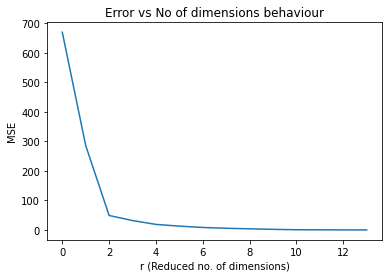

In [118]:
#setup PCA

cov_mat = np.cov([disp_main[0,:],disp_main[1,:],disp_main[2,:],disp_main[3,:],disp_main[4,:],disp_main[5,:],disp_main[6,:],disp_main[7,:],disp_main[8,:],disp_main[9,:],disp_main[10,:],disp_main[11,:],disp_main[12,:],disp_main[13,:],disp_main[14,:]])

eig_val, eig_vec = np.linalg.eig(cov_mat)

Mse_range_pca = []
for i in range(14):  
  Mse_range_pca.append(find_error_pca(i))

plt.plot(Mse_range_pca)
plt.ylabel("MSE")
plt.xlabel("r (Reduced no. of dimensions)")
plt.title("Error vs No of dimensions behaviour")
plt.show()

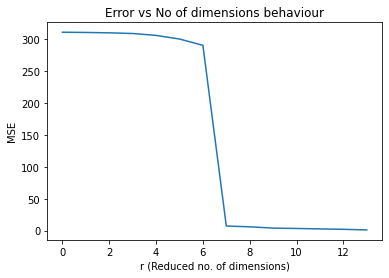

In [116]:
#setup mode

w_mode,v_mode = np.linalg.eig(stiffness_matrix)
Mse_range_mode = []
for i in range(14):  
  Mse_range_mode.append(find_error_mode(i))

plt.plot(Mse_range_mode)
plt.ylabel("MSE")
plt.xlabel("r (Reduced no. of dimensions)")
plt.title("Error vs No of dimensions behaviour")
plt.show()